Qualifying Performance 

In [2]:
import fastf1
session = fastf1.get_session(2025, 'Miami', 'Q')
session.load()

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	D

In [26]:
ver_lap = session.laps.pick_drivers('VER').pick_fastest()
lec_lap = session.laps.pick_drivers('LEC').pick_fastest()
print("Verstappen Fastest Lap :",ver_lap['LapTime'])
print("Verstappen Fastest Lap :",lec_lap['LapTime'])
print(ver_lap.info())

Verstappen Fastest Lap : 0 days 00:01:26.204000
Verstappen Fastest Lap : 0 days 00:01:26.754000
<class 'fastf1.core.Lap'>
Index: 31 entries, Time to IsAccurate
Series name: 16
Non-Null Count  Dtype 
--------------  ----- 
28 non-null     object
dtypes: object(1)
memory usage: 1.5+ KB
None


In [12]:
import pandas as pd
ver_tel = ver_lap.get_car_data().add_distance()
lec_tel = lec_lap.get_car_data().add_distance()
print(ver_tel[['Date','RPM' , 'Speed' , 'nGear' , 'Throttle' , 'Brake'  ,'DRS']].head())
print(lec_tel[['Date','RPM' , 'Speed' , 'nGear' , 'Throttle' , 'Brake'  ,'DRS']].head())


                     Date      RPM  Speed  nGear  Throttle  Brake  DRS
0 2025-05-03 21:13:09.803  10503.0  295.0      8     100.0  False   12
1 2025-05-03 21:13:10.043  10513.0  298.0      8     100.0  False   12
2 2025-05-03 21:13:10.323  10700.0  301.0      8     100.0  False   12
3 2025-05-03 21:13:10.643  10858.0  304.0      8     100.0  False   12
4 2025-05-03 21:13:11.003  10913.0  307.0      8     100.0  False   12
                     Date      RPM  Speed  nGear  Throttle  Brake  DRS
0 2025-05-03 21:13:23.003  10546.0  299.0      8      99.0  False   12
1 2025-05-03 21:13:23.403  10741.0  303.0      8      99.0  False   12
2 2025-05-03 21:13:23.563  10810.0  304.0      8      99.0  False   12
3 2025-05-03 21:13:23.963  10899.0  307.0      8      99.0  False   12
4 2025-05-03 21:13:24.163  10976.0  309.0      8      99.0  False   12


In [16]:
from fastf1.plotting import setup_mpl
import matplotlib.pyplot as plt

setup_mpl(color_scheme='fastf1')

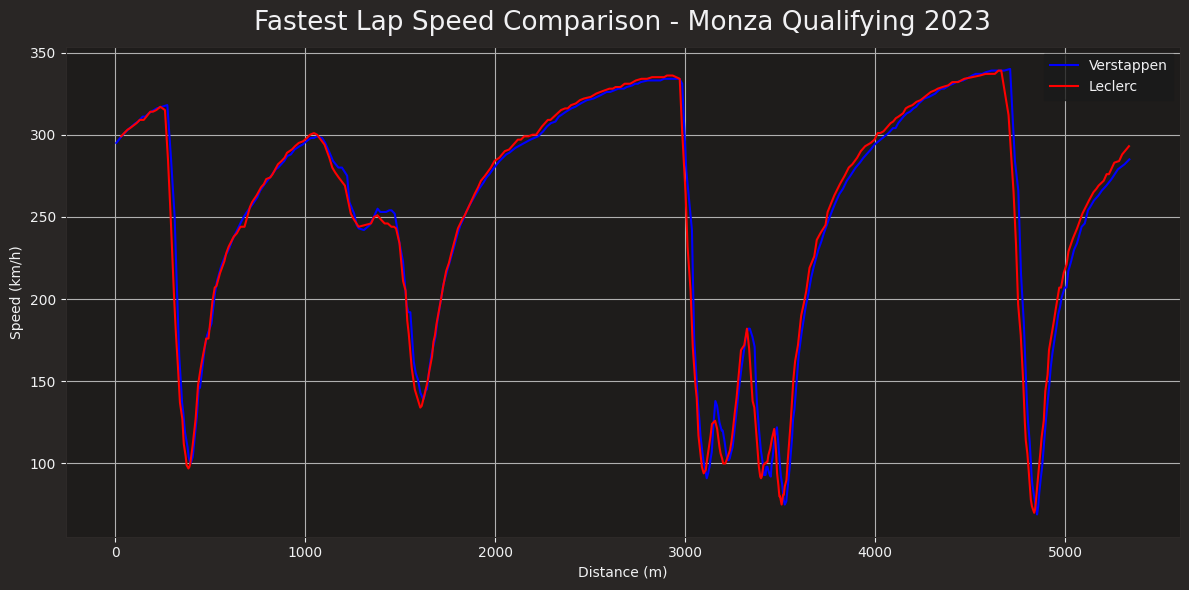

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='Verstappen', color='blue')
plt.plot(lec_tel['Distance'], lec_tel['Speed'], label='Leclerc', color='red')
plt.title('Fastest Lap Speed Comparison - Monza Qualifying 2023')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

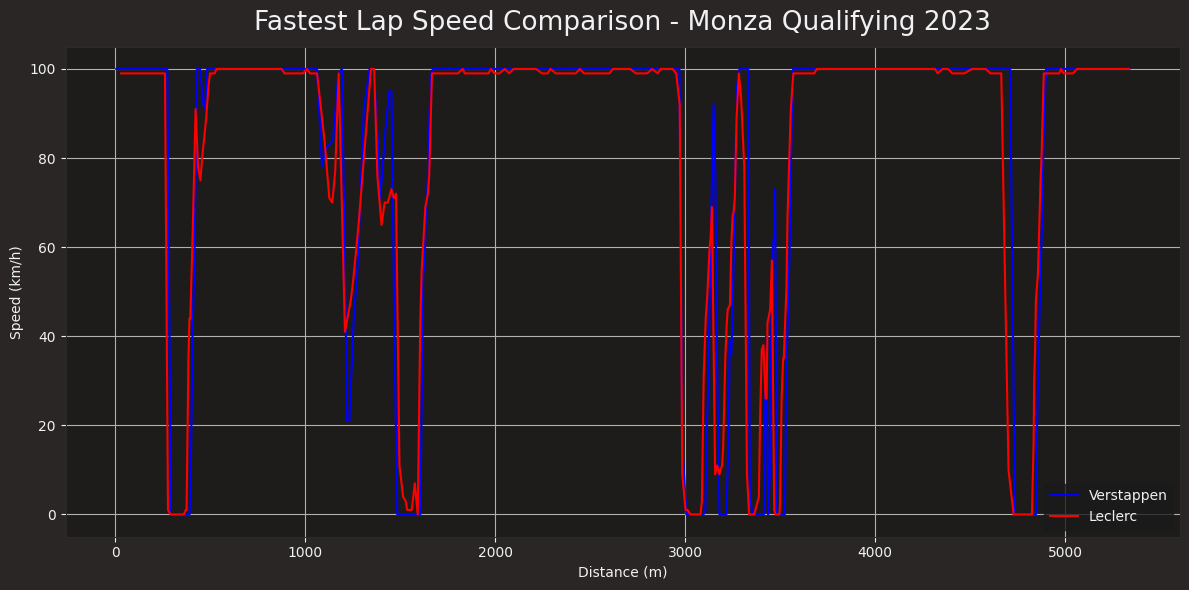

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(ver_tel['Distance'], ver_tel['Throttle'], label='Verstappen', color='blue')
plt.plot(lec_tel['Distance'], lec_tel['Throttle'], label='Leclerc', color='red')
plt.title('Fastest Lap Speed Comparison - Monza Qualifying 2023')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


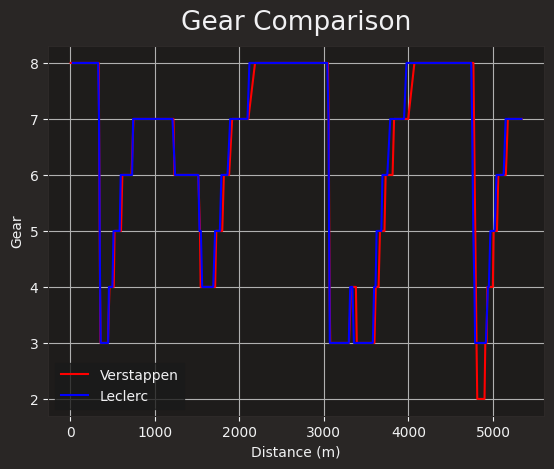

In [38]:

plt.plot(ver_tel['Distance'], ver_tel['nGear'], label='Verstappen', color='red')
plt.plot(lec_tel['Distance'], lec_tel['nGear'], label='Leclerc', color='blue')
plt.title('Gear Comparison')
plt.xlabel('Distance (m)')
plt.ylabel('Gear')
plt.legend()
plt.grid(True)


plt.show()

In [48]:
ver_pos = ver_lap.get_pos_data()
lec_pos = ver_lap.get_pos_data()


In [46]:
coord = ver_pos[['X','Y','Z']]
print(coord)

          X      Y      Z
0    1895.0   92.0  250.0
1    2118.0  -48.0  251.0
2    2457.0 -262.0  251.0
3    2586.0 -343.0  251.0
4    2759.0 -451.0  250.0
..      ...    ...    ...
320  1066.0  504.0  246.0
321  1210.0  454.0  247.0
322  1408.0  371.0  248.0
323  1629.0  255.0  249.0
324  1801.0  152.0  250.0

[325 rows x 3 columns]


In [49]:
ver_merged = ver_pos.merge(ver_tel, left_index=True, right_index=True)
lec_merged = lec_pos.merge(lec_tel, left_index=True, right_index=True)

In [64]:
# Create a colored line collection for speed
import numpy as np
from matplotlib.collections import LineCollection
def create_colored_line(data, label, color,color2):
    points = np.array([data['X'], data['Y']]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=color2, norm=plt.Normalize(150, 350))
    lc.set_array(data['Speed'])
    lc.set_linewidth(2)
    return lc

In [85]:
import matplotlib.patheffects as pe

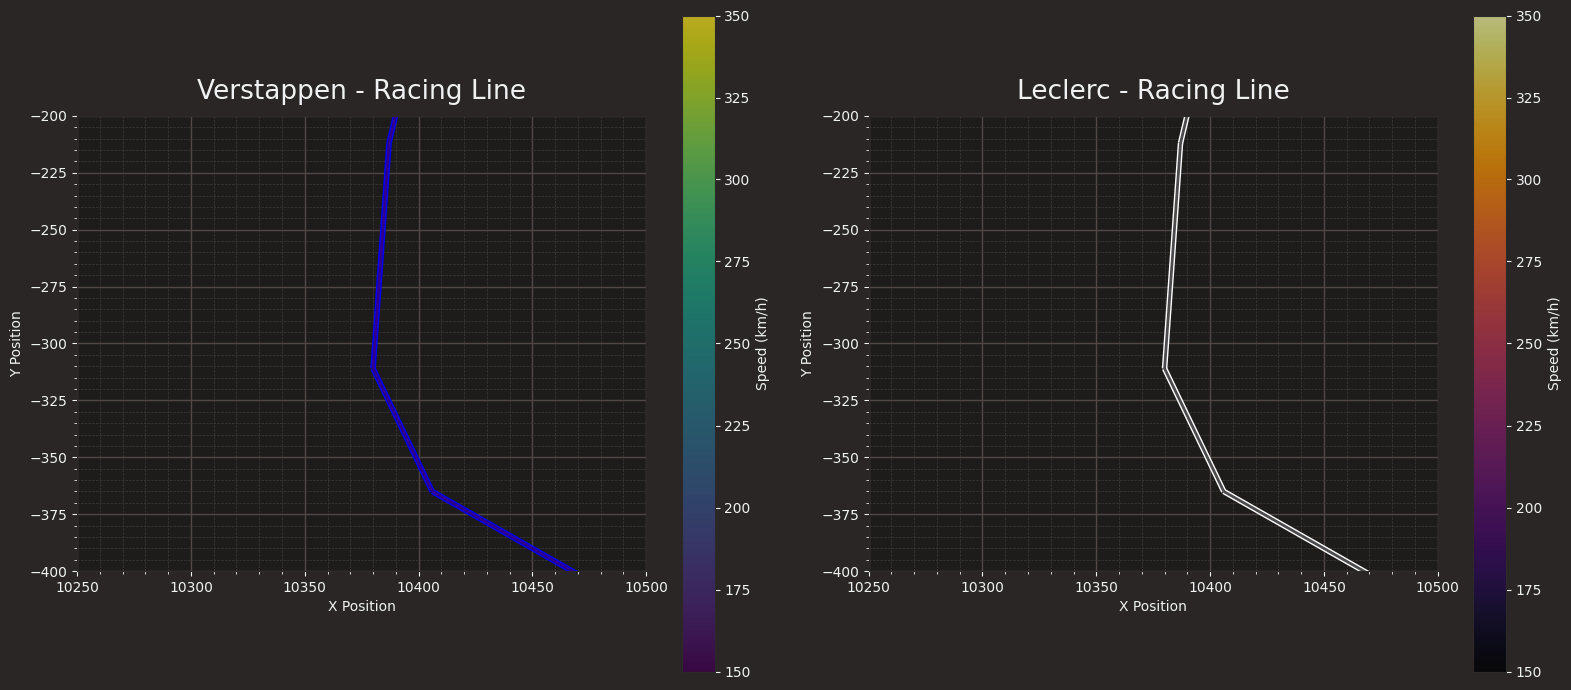

In [93]:
ver_line = create_colored_line(ver_merged, "VER", 'red', 'viridis')
ver_line.set_path_effects([pe.Stroke(linewidth=4, foreground='blue'), pe.Normal()])
ver_line.set_alpha(0.7)

lec_line = create_colored_line(lec_merged, "LEC", 'blue', 'inferno')
lec_line.set_path_effects([pe.Stroke(linewidth=4, foreground='white'), pe.Normal()])
lec_line.set_alpha(0.7)

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Add racing lines to each subplot
ax1.add_collection(ver_line)
ax1.set_title('Verstappen - Racing Line')
ax1.set_xlabel('X Position')
ax1.set_ylabel('Y Position')
ax1.set_xlim(10250, 10500)
ax1.set_ylim(-400, -200)
ax1.set_aspect('equal', 'box')
ax1.grid(True)

ax2.add_collection(lec_line)
ax2.set_title('Leclerc - Racing Line')
ax2.set_xlabel('X Position')
ax2.set_ylabel('Y Position')
ax2.set_xlim(10250, 10500)
ax2.set_ylim(-400, -200)
ax2.set_aspect('equal', 'box')
ax2.grid(True)

# Add separate colorbars
cbar1 = plt.colorbar(ver_line, ax=ax1)
cbar1.set_label('Speed (km/h)')

cbar2 = plt.colorbar(lec_line, ax=ax2)
cbar2.set_label('Speed (km/h)')

plt.tight_layout()
plt.show()

In [106]:
%matplotlib notebook
import matplotlib.animation as animation
ver = session.laps.pick_driver('VER').pick_fastest().get_car_data().add_distance()
lec = session.laps.pick_driver('LEC').pick_fastest().get_car_data().add_distance()

# Interpolate to match timestamps
ver_times = ver['Time'].dt.total_seconds()
lec_times = lec['Time'].dt.total_seconds()


common_time = np.linspace(
    max(ver_times.iloc[0], lec_times.iloc[0]),
    min(ver_times.iloc[-1], lec_times.iloc[-1]),
    1000
)





ver_interp = ver.set_index(ver['Time'].dt.total_seconds()).reindex(common_time, method='nearest')
lec_interp = lec.set_index(lec['Time'].dt.total_seconds()).reindex(common_time, method='nearest')

ver_interp['InterpTime'] = common_time
lec_interp['InterpTime'] = common_time

ver_interp.reset_index(drop=True, inplace=True)
lec_interp.reset_index(drop=True, inplace=True)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ghost Lap Animation - Miami Q 2025')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_xlim(-5000, 11000)
ax.set_ylim(-5000, 2000)

ver_point, = ax.plot([], [], 'o', color='red', label='Verstappen')
lec_point, = ax.plot([], [], 'o', color='blue', label='Leclerc')
ax.legend()

def init():
    ver_point.set_data([], [])
    lec_point.set_data([], [])
    return ver_point, lec_point

def update(frame):
    ver_point.set_data(ver_interp['X'].iloc[frame], ver_interp['Y'].iloc[frame])
    lec_point.set_data(lec_interp['X'].iloc[frame], lec_interp['Y'].iloc[frame])
    return ver_point, lec_point

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(common_time),
    init_func=init,
    blit=False,
    interval=10
)
ani.save('ghost_lap.mp4', fps=30)
plt.tight_layout()
plt.show()

C:\Users\onkar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
C:\Users\onkar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

Position Data

In [109]:
session1 = fastf1.get_session(2025, 'Miami', 'R')
session1.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_me

In [125]:
ver_laps = session1.laps.pick_drivers("VER")
ver_laps = ver_laps.dropna(subset=['LapNumber', 'Position'])
print(ver_laps)
ver_laps.info()

                     Time Driver DriverNumber                LapTime  \
0  0 days 00:58:51.257000    VER            1 0 days 00:01:35.669000   
1  0 days 01:00:42.385000    VER            1 0 days 00:01:51.128000   
2  0 days 01:02:48.331000    VER            1 0 days 00:02:05.946000   
3  0 days 01:04:20.900000    VER            1 0 days 00:01:32.569000   
4  0 days 01:05:53.033000    VER            1 0 days 00:01:32.133000   
5  0 days 01:07:25.129000    VER            1 0 days 00:01:32.096000   
6  0 days 01:08:57.212000    VER            1 0 days 00:01:32.083000   
7  0 days 01:10:29.795000    VER            1 0 days 00:01:32.583000   
8  0 days 01:12:02.201000    VER            1 0 days 00:01:32.406000   
9  0 days 01:13:34.593000    VER            1 0 days 00:01:32.392000   
10 0 days 01:15:07.188000    VER            1 0 days 00:01:32.595000   
11 0 days 01:16:39.424000    VER            1 0 days 00:01:32.236000   
12 0 days 01:18:11.696000    VER            1 0 days 00:01:32.27

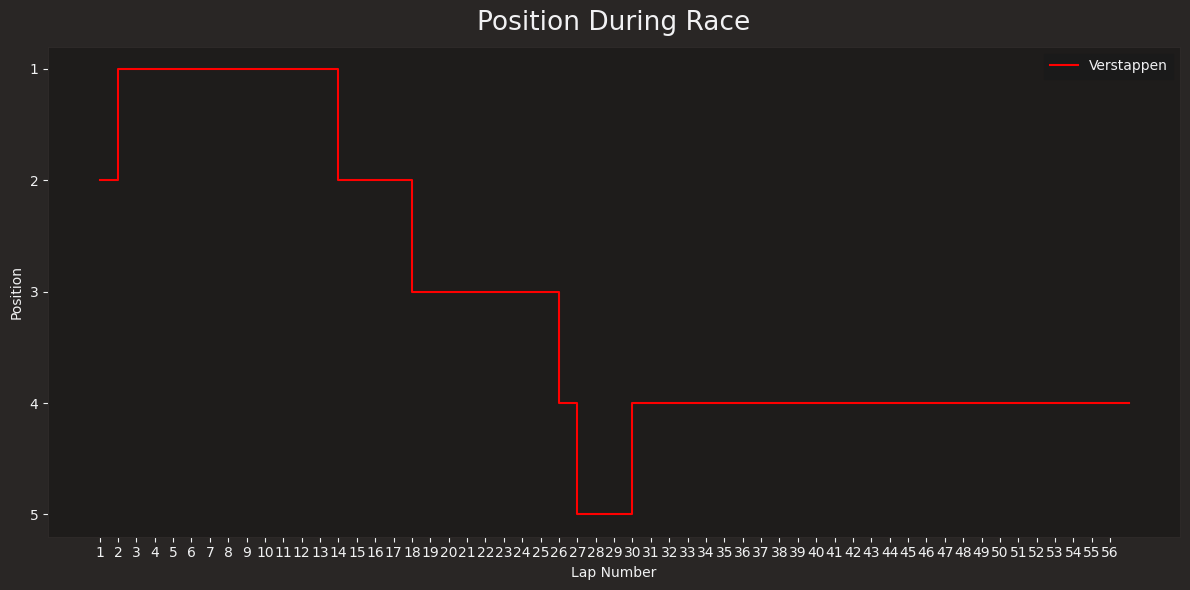

In [135]:
%matplotlib inline
x = ver_laps['LapNumber']
y = ver_laps['Position']


plt.figure(figsize=(12, 6))
plt.title("Position During Race")
plt.xlabel("Lap Number")
plt.ylabel("Position")
plt.yticks(np.arange(1, 21, 1))
plt.xticks(np.arange(1,57,1))
plt.step(x, y, color='red', where="post", label="Verstappen")
plt.gca().invert_yaxis()  # P1 at the top
plt.legend()
plt.tight_layout()
plt.show()


In [136]:
laps = session1.laps
print(laps)

                       Time Driver DriverNumber                LapTime  \
0    0 days 00:58:51.257000    VER            1 0 days 00:01:35.669000   
1    0 days 01:00:42.385000    VER            1 0 days 00:01:51.128000   
2    0 days 01:02:48.331000    VER            1 0 days 00:02:05.946000   
3    0 days 01:04:20.900000    VER            1 0 days 00:01:32.569000   
4    0 days 01:05:53.033000    VER            1 0 days 00:01:32.133000   
...                     ...    ...          ...                    ...   
1000 0 days 01:35:45.563000    BEA           87 0 days 00:01:32.680000   
1001 0 days 01:37:18.617000    BEA           87 0 days 00:01:33.054000   
1002 0 days 01:38:52.757000    BEA           87 0 days 00:01:34.140000   
1003 0 days 01:40:26.361000    BEA           87 0 days 00:01:33.604000   
1004 0 days 01:41:34.048000    BEA           87                    NaT   

      LapNumber  Stint PitOutTime PitInTime            Sector1Time  \
0           1.0    NaN        NaT       N

In [143]:
laps_clean = session1.laps
laps = laps.dropna(subset=['Position', 'LapNumber', 'Driver'])
# Filter for drivers who completed at least 90% of the race
drivers = laps['Driver'].unique()
position_data = {}

max_laps = laps['LapNumber'].max()

for driver in drivers:
    driver_laps = laps.pick_driver(driver)
    completed_laps = driver_laps['LapNumber'].max()

    # Only include drivers who completed at least 90% of the race
    if completed_laps >= 0.9 * max_laps:
        positions = driver_laps.set_index('LapNumber')['Position']
        position_data[driver] = positions



In [144]:
position_df = pd.DataFrame(position_data)
print(position_df)

           VER   GAS  ANT   ALO  LEC   STR   TSU  ALB   HUL   OCO  NOR   HAM  \
LapNumber                                                                      
1.0        2.0  19.0  3.0  18.0  9.0  16.0  10.0  6.0  15.0  11.0  7.0  13.0   
2.0        1.0  18.0  2.0  17.0  8.0  15.0   9.0  5.0  14.0  10.0  6.0  12.0   
3.0        1.0  18.0  2.0  17.0  8.0  15.0   9.0  5.0  14.0  10.0  6.0  12.0   
4.0        1.0  18.0  3.0  17.0  8.0  15.0   9.0  6.0  14.0  10.0  5.0  11.0   
5.0        1.0  18.0  3.0  17.0  8.0  15.0   9.0  7.0  14.0  10.0  5.0  11.0   
6.0        1.0  18.0  3.0  17.0  8.0  15.0   9.0  7.0  14.0  10.0  5.0  11.0   
7.0        1.0  18.0  3.0  17.0  8.0  15.0   9.0  7.0  14.0  10.0  4.0  11.0   
8.0        1.0  18.0  3.0  17.0  8.0  15.0   9.0  7.0  14.0  10.0  4.0  11.0   
9.0        1.0  17.0  4.0  18.0  8.0  15.0   9.0  7.0  14.0  10.0  3.0  11.0   
10.0       1.0  17.0  4.0  18.0  8.0  15.0   9.0  7.0  14.0  10.0  3.0  11.0   
11.0       1.0  17.0  4.0  18.0  8.0  15

In [152]:
import matplotlib.cm as cm

C:\Users\onkar\AppData\Local\Temp\ipykernel_50548\1777915509.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('nipy_spectral', len(position_df.columns))


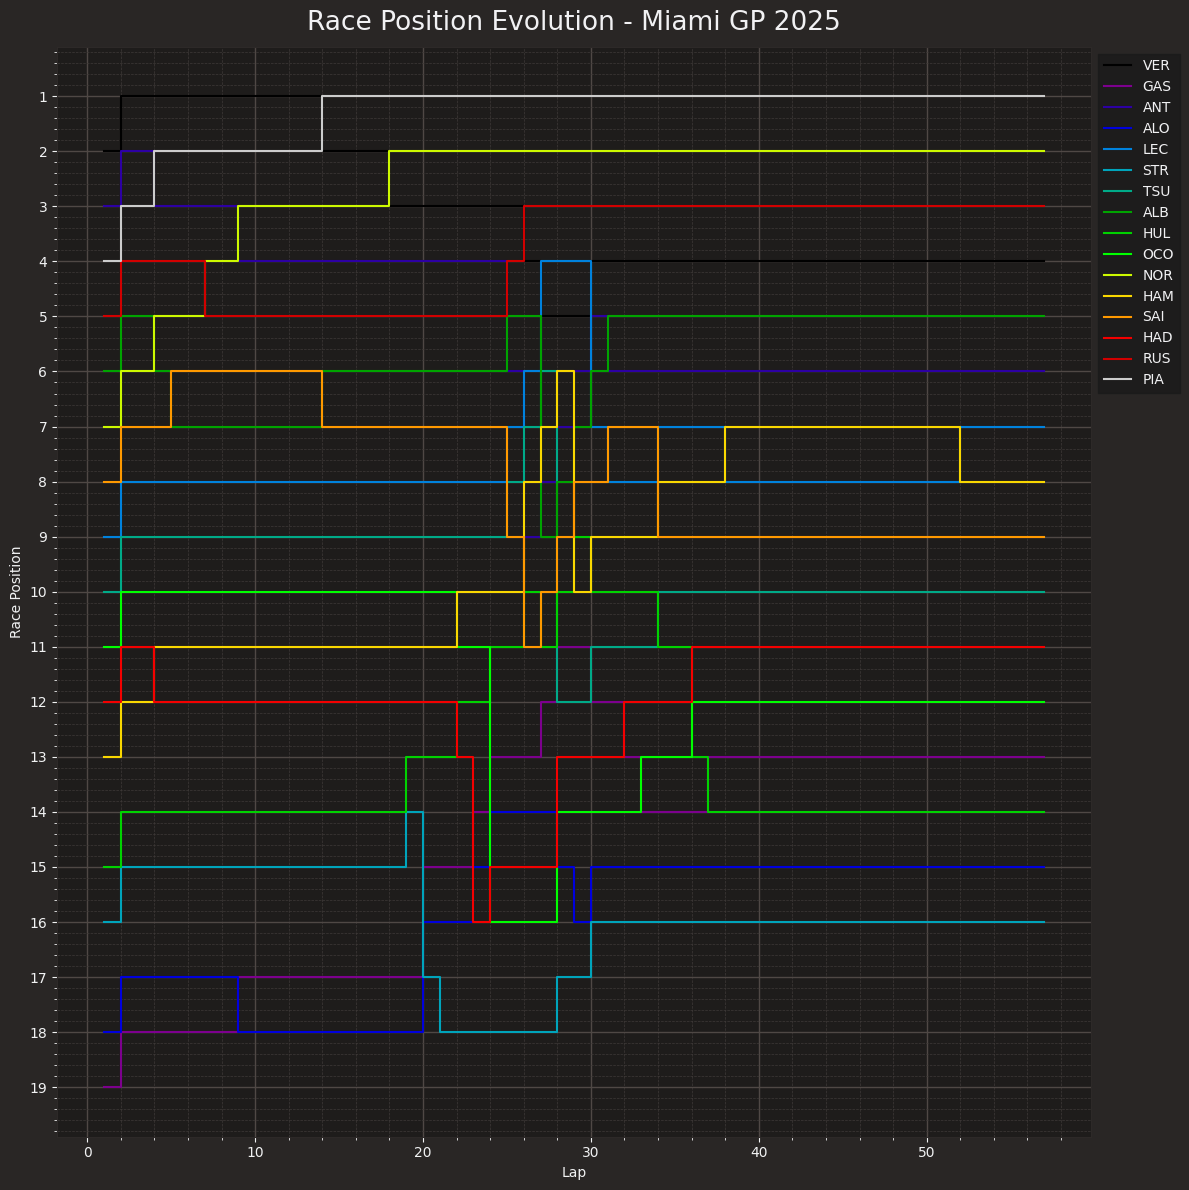

In [155]:
fig, ax = plt.subplots(figsize=(12, 12))

colormap = cm.get_cmap('nipy_spectral', len(position_df.columns))
colors = [colormap(i) for i in range(len(position_df.columns))]

for i, driver in enumerate(position_df.columns):
    ax.step(position_df.index, position_df[driver], where='post', label=driver, color=colors[i])

ax.invert_yaxis()
plt.yticks(np.arange(1,20,1))
ax.set_ylabel('Race Position')
ax.set_xlabel('Lap')
ax.set_title('Race Position Evolution - Miami GP 2025')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()